# Exploratory Data Analysis – Ames House Price Dataset

the Ames Housing dataset describes the sale of individual residential properties from the Ames Assessor’s Office used in computing assets values from 2006 to 2010 in Ames, Iowa, USA. It was compiled by Dean De Cock. The data file consists of 2930 rows, 82 colums which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

### Problem Statement: In this dataset, I will atempt to explore the data and highlight correlations among variables, obtaining a clean data file as a result.

### In this notebook the following steps will be implemented to explore the above-mentioned dataset:

•	Uploading the data file in the convenient formatting of the data from .txt to .csv file.

•	Getting the shape and the statistical description of the data.

• Data cleaning and handling missing values.

•	Applying Graphical Exploratory Data Analysis techniques to describe the data( Graphical uni-variate / Graphical multi-variate).


---



In [1]:
#import all relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import google drive to load the data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#data file path
data = open('/content/gdrive/MyDrive/AmesHousing/AmesHousing.txt', 'r')

In [4]:
#loading the data as a .csv file
data = pd.read_csv('/content/gdrive/MyDrive/AmesHousing/AmesHousing.txt', "\t")
data.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
#printing out name of the headers
print(list(data.columns.values))

['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

In [6]:
# Number of colums & rows in the dataset
print('The dataset has {} rows and {} colums'.format(data.shape[0], data.shape[1]))

The dataset has 2930 rows and 82 colums


In [7]:
#statistical description of the data
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
#info about each colum and data size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [9]:
#the target colum statistical features
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Observation: the target variable does not follow the classic bell-curve shape which means it is abnormally distrbuted with a left Skewness.

Skewness: 1.743500
Kurtosis: 5.118900


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


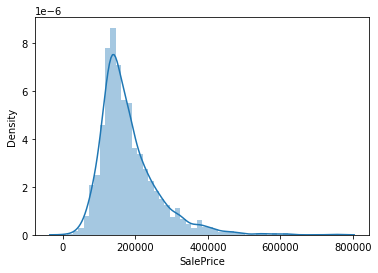

In [10]:
#skewness and kurtosis of the target variable
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())
sns.distplot(data['SalePrice'])

### Numerical and Categorical Features

In [11]:
#identifying the numerical and categorical features
numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
print(data[numerical_feats].columns)

print("*"*100)

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))
print(data[categorical_feats].columns)

Number of Numerical features:  39
Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')
****************************************************************************************************
Number of Categorical features:  43
Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'C

### Removing outliers
As advised in the special notes section in the dataset documentation to drop properties with living area greater than 4000 sq feet because they are defined as outliers.


In [12]:
# removing outliers over than 4000 sqf
data.drop(index=data.loc[data.loc[:,'Gr Liv Area'] > 4000].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2925 non-null   object 
 9   Land Contour     2925 non-null   object 
 10  Utilities        2925 non-null   object 
 11  Lot Config       2925 non-null   object 
 12  Land Slope       2925 non-null   object 
 13  Neighborhood     2925 non-null   object 
 14  Condition 1      2925 non-null   object 
 15  Condition 2      2925 non-null   object 
 16  Bldg Type        2925 non-null   object 
 17  House Style   

In [13]:
#validation of removing outliers which are 5 sales/rows
print('The dataset has {} rows and {} colums'.format(data.shape[0], data.shape[1]))

The dataset has 2925 rows and 82 colums


In [14]:
#In this dataset, we have 2925 sales. Let's have a look on the most, average  and the least sale
print('The most expensive house sold for ${:,.0f}'.format(data.SalePrice.max()))

print('The average sale price is ${:,.0f}'.format(data.SalePrice.mean()))

print('The cheapest house sold for ${:,.0f}'.format(data.SalePrice.min()))

The most expensive house sold for $625,000
The average sale price is $180,412
The cheapest house sold for $12,789


### Encoding non-numeric values

For the sake of consistancy and analysis, an encoding process will be utilized for some ordinal colums as follows:

Note: '0' is the least and '4' is the maximum

In [15]:
# create new python dictionaries for each ordinal field that can be encoded
Lot_Shape_dct = {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
data["Lot Shape"] = data["Lot Shape"].map(Lot_Shape_dct)

Utilities_dct = {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}
data["Utilities"] = data["Utilities"].map(Utilities_dct)

Land_Slope_dct = {'Sev': 0, 'Mod': 1, 'Gtl': 2}
data["Land Slope"] = data["Land Slope"].map(Land_Slope_dct)

Exter_Qual_dct = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4}
data["Exter Qual"] = data["Exter Qual"].map(Exter_Qual_dct)

Exter_Cond_dct = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4}
data["Exter Cond"] = data["Exter Cond"].map(Exter_Cond_dct)

Bsmt_Qual_dct = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4}
data["Bsmt Qual"]= data["Bsmt Qual"].map(Bsmt_Qual_dct)

Bsmt_Cond_dct = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4}
data["Bsmt Cond"] = data["Bsmt Cond"].map(Bsmt_Cond_dct)

Heating_QC_dct = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4}
data["Heating QC"] = data["Heating QC"].map(Heating_QC_dct)

Electrical_dct = {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr':4}
data["Electrical"] = data["Electrical"].map(Electrical_dct)

Kitchen_Qual_dct = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4}
data["Kitchen Qual"] = data["Kitchen Qual"].map(Kitchen_Qual_dct)

Functional_dct = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
data["Functional"] = data["Functional"].map(Functional_dct)

Fireplace_Qu_dct = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4}
data["Fireplace Qu"] = data["Fireplace Qu"].map(Fireplace_Qu_dct)

Garage_Finish_dct = {'Unf': 0, 'RFn': 1, 'Fin': 2}
data["Garage Finish"] = data["Garage Finish"].map(Garage_Finish_dct)

Garage_Qual_dct = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4}
data["Garage Qual"] = data["Garage Qual"].map(Garage_Qual_dct)

Garage_Cond_dct = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4}
data["Garage Cond"] = data["Garage Cond"].map(Garage_Cond_dct)

Paved_Drive_dct = {'N': 0, 'P': 1, 'Y': 2}
data["Paved Drive"] = data["Paved Drive"].map(Paved_Drive_dct)


In [16]:
#validating the encoding process
data.head(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,2,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,3,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,2,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,3,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,2,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,2,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,3,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,2,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,2,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,3,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


### Handling missing values

In [17]:
#identifing features with missing values
data.isnull() .any()

Order             False
PID               False
MS SubClass       False
MS Zoning         False
Lot Frontage       True
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 82, dtype: bool

In [18]:
#identifing number of features with missing values
data.isnull(). any(). sum()

27

In [19]:
#identifing duplicated features
sum(data.duplicated())

0

In [20]:
#identifing observations count
data.count()

Order             2925
PID               2925
MS SubClass       2925
MS Zoning         2925
Lot Frontage      2435
                  ... 
Mo Sold           2925
Yr Sold           2925
Sale Type         2925
Sale Condition    2925
SalePrice         2925
Length: 82, dtype: int64

In [21]:
#handling missing values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Pool QC,2914,0.996239
Misc Feature,2820,0.964103
Alley,2727,0.932308
Fence,2354,0.804786
Fireplace Qu,1422,0.486154
Lot Frontage,490,0.167521
Garage Cond,159,0.054359
Garage Finish,159,0.054359
Garage Yr Blt,159,0.054359
Garage Qual,159,0.054359


In [22]:
#dropping irrelevent colums cause it has too much NAN values. Hence, It will not be practical to fill it in.
data = data.drop(columns=['Alley', 'Pool QC', 'Fence'])
data.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,2,Lvl,3,...,0,0,0,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,3,Lvl,3,...,0,120,0,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,2,Lvl,3,...,0,0,0,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,3,Lvl,3,...,0,0,0,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,2,Lvl,3,...,0,0,0,NaN,0,3,2010,WD,Normal,189900


In [23]:
#using the .fillna function to fill in the missing data with 'N/A' as the house does not have that feature
colums_fillna = ['Misc Feature','Mas Vnr Type','Fireplace Qu',
               'Garage Qual','Garage Cond','Garage Finish','Garage Type', 'Electrical',
               'Kitchen Qual', 'Sale Type', 'Functional', 'Exterior 2nd', 'Exterior 1st',
               'Bsmt Exposure','Bsmt Cond','Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2',
               'MS Zoning', 'Utilities']

# replace 'NaN' with 'None' in these columns cause it is not missing values as it is not provided feature of the house.
for col in colums_fillna:
    data[col].fillna('N/A',inplace=True)
    
data.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,2,Lvl,3,...,0,0,0,N/A,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,3,Lvl,3,...,0,120,0,N/A,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,2,Lvl,3,...,0,0,0,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,3,Lvl,3,...,0,0,0,N/A,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,2,Lvl,3,...,0,0,0,N/A,0,3,2010,WD,Normal,189900


In [24]:
#calculating how many missing value left
data.isnull(). any(). sum()

11

In [25]:
#identifying the left missing values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Lot Frontage,490,0.167521
Garage Yr Blt,159,0.054359
Mas Vnr Area,23,0.007863
Bsmt Full Bath,2,0.000684
Bsmt Half Bath,2,0.000684


In [26]:
#identifying the left missing values in each feature
data.isnull() .any()

Order             False
PID               False
MS SubClass       False
MS Zoning         False
Lot Frontage       True
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 79, dtype: bool

In [27]:
#fill in the left missing values using the mean of each colum
data['Lot Frontage'].fillna((data['Lot Frontage'].mean()), inplace=True)
data['Garage Yr Blt'].fillna((data['Garage Yr Blt'].mean()), inplace=True)
data['Garage Cars'].fillna((data['Garage Cars'].mean()), inplace=True)
data['Garage Area'].fillna((data['Garage Area'].mean()), inplace=True)
data['Mas Vnr Area'].fillna((data['Mas Vnr Area'].mean()), inplace=True)
data['Bsmt Full Bath'].fillna((data['Bsmt Full Bath'].mean()), inplace=True)
data['Bsmt Half Bath'].fillna((data['Bsmt Half Bath'].mean()), inplace=True)
data['Total Bsmt SF'].fillna((data['Total Bsmt SF'].mean()), inplace=True)
data['Bsmt Unf SF'].fillna((data['Bsmt Unf SF'].mean()), inplace=True)
data['BsmtFin SF 1'].fillna((data['BsmtFin SF 1'].mean()), inplace=True)
data['BsmtFin SF 2'].fillna((data['BsmtFin SF 2'].mean()), inplace=True)

In [28]:
#validating that there is no more missing values
data.isnull(). any(). sum()

0

# Correlation indentification to the target variable 'SalePrice'


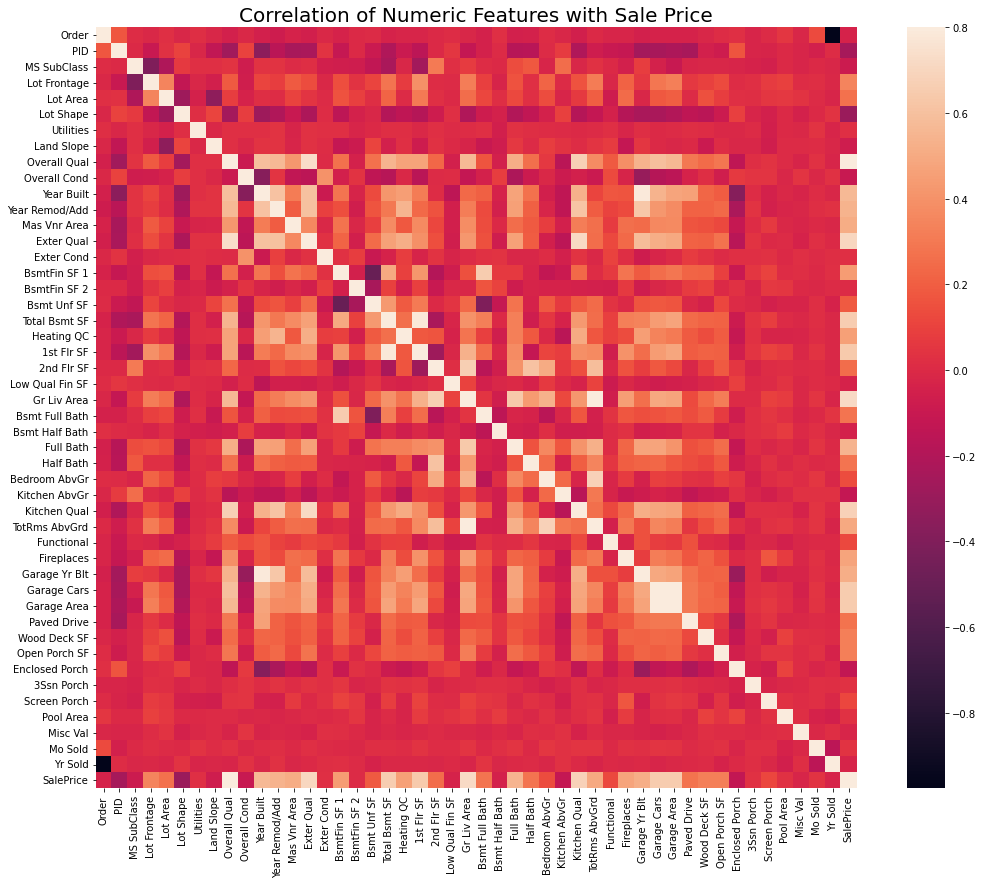

In [29]:
#SalePrice orrelation with numeric features heatmap
f , ax = plt.subplots(figsize = (18,14))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=20)
sns.heatmap(data.corr(),square = True,  vmax=0.8)

In [30]:
#droppingg relatively duplicate colums according to the above heatmap
data = data.drop(columns=['Garage Area','1st Flr SF'])
data.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,2,Lvl,3,...,0,0,0,N/A,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,3,Lvl,3,...,0,120,0,N/A,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,2,Lvl,3,...,0,0,0,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,3,Lvl,3,...,0,0,0,N/A,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,2,Lvl,3,...,0,0,0,N/A,0,3,2010,WD,Normal,189900


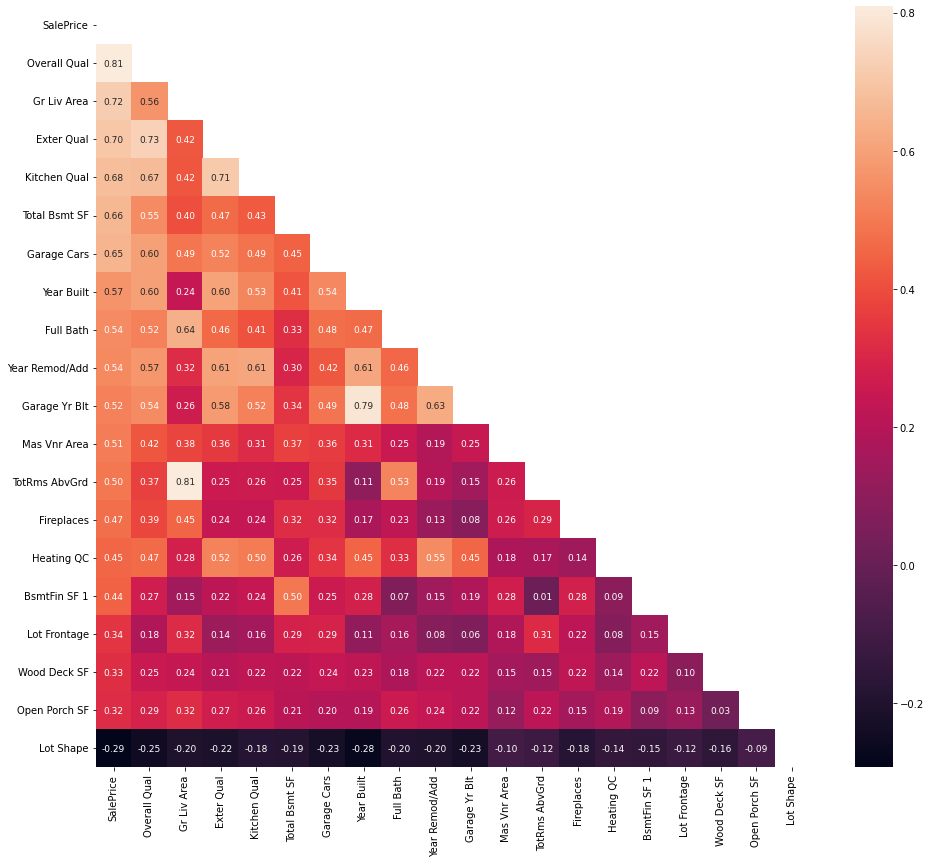

In [31]:
#identifying top corr. to the target variable 'SalePrice'
corr_to_saleprice = data.corr().loc[:,'SalePrice']
top_correlations = corr_to_saleprice.abs().sort_values(ascending=False).head(20)

top_correlations = data.loc[:,list(top_correlations.index)].corr()

tc = np.zeros_like(top_correlations)
tc[np.triu_indices_from(tc)] = True

plt.figure(figsize=(16, 14))

g = sns.heatmap(top_correlations, annot=True, annot_kws={"size":9}, fmt='.2f', mask=tc)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

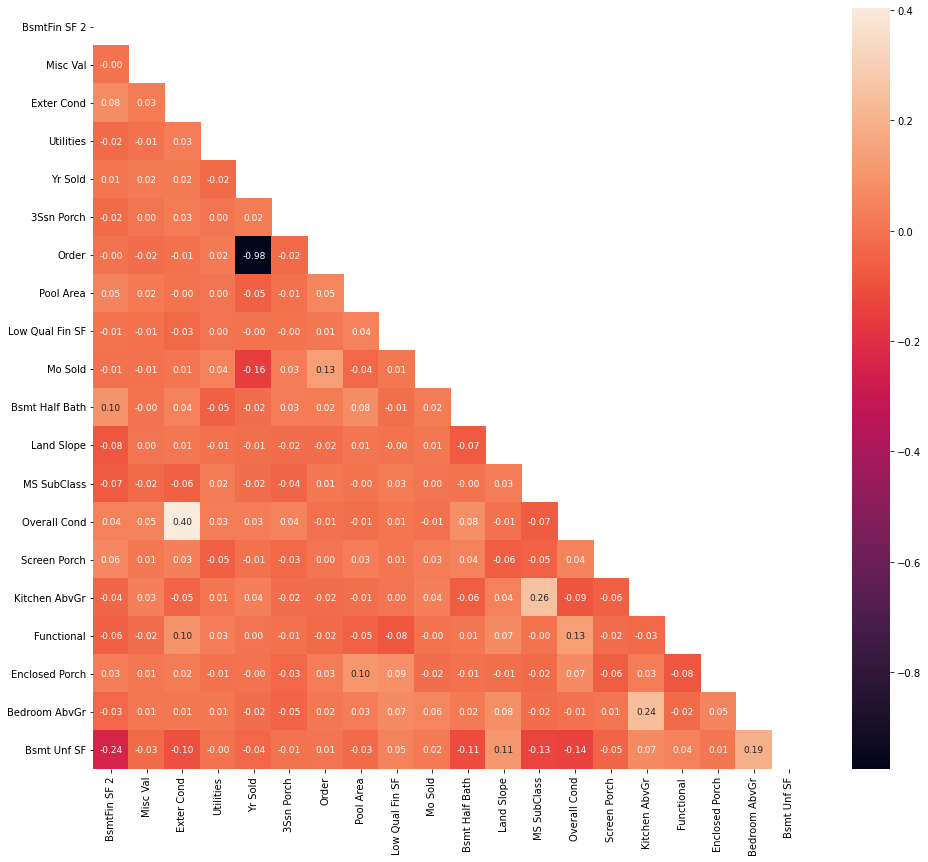

In [32]:
#identifying least corr. to the target variable 'SalePrice'
corr_to_saleprice = data.corr().loc[:,'SalePrice']
least_correlations = corr_to_saleprice.abs().sort_values(ascending=True).head(20)

least_correlations = data.loc[:,list(least_correlations.index)].corr()

lc = np.zeros_like(least_correlations)
lc[np.triu_indices_from(lc)] = True

plt.figure(figsize=(16, 14))

g = sns.heatmap(least_correlations, annot=True, annot_kws={"size":9}, fmt='.2f', mask=lc)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

In [33]:
#droppingg unnecessary colums according to the above least correlated features
data = data.drop(columns=['Misc Val','3Ssn Porch', 'Pool Area', 'Low Qual Fin SF', 'Bsmt Full Bath','Bsmt Half Bath', 'MS SubClass', 'Overall Cond', 'Screen Porch', 'Enclosed Porch', 'Bsmt Unf SF', 'PID', '2nd Flr SF'])
data.head(5)

,Order,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Misc Feature,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,RL,141.0,31770,Pave,2,Lvl,3,Corner,2,...,2.0,1,210,62,N/A,5,2010,WD,Normal,215000
1,2,RH,80.0,11622,Pave,3,Lvl,3,Inside,2,...,2.0,2,140,0,N/A,6,2010,WD,Normal,105000
2,3,RL,81.0,14267,Pave,2,Lvl,3,Corner,2,...,2.0,2,393,36,Gar2,6,2010,WD,Normal,172000
3,4,RL,93.0,11160,Pave,3,Lvl,3,Corner,2,...,2.0,2,0,0,N/A,4,2010,WD,Normal,244000
4,5,RL,74.0,13830,Pave,2,Lvl,3,Inside,2,...,2.0,2,212,34,N/A,3,2010,WD,Normal,189900


# When were the houses built?

Regarding the time when the houses were constructed, the analysis shows that the oldest house sold was built in 1872 while the newest house was sold was built in 2010. Additionally, most of the sold houses were built i the 70s. Nonetheless, the correlation between the time when the houses were constrcted and the 'SalePrice' is relatively weak.

In [34]:
#statistical description of the field 'Year Built'
data['Year Built'].describe()

count    2925.000000
mean     1971.302906
std        30.242474
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: Year Built, dtype: float64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]), <a list of 118 Text major ticklabel objects>)

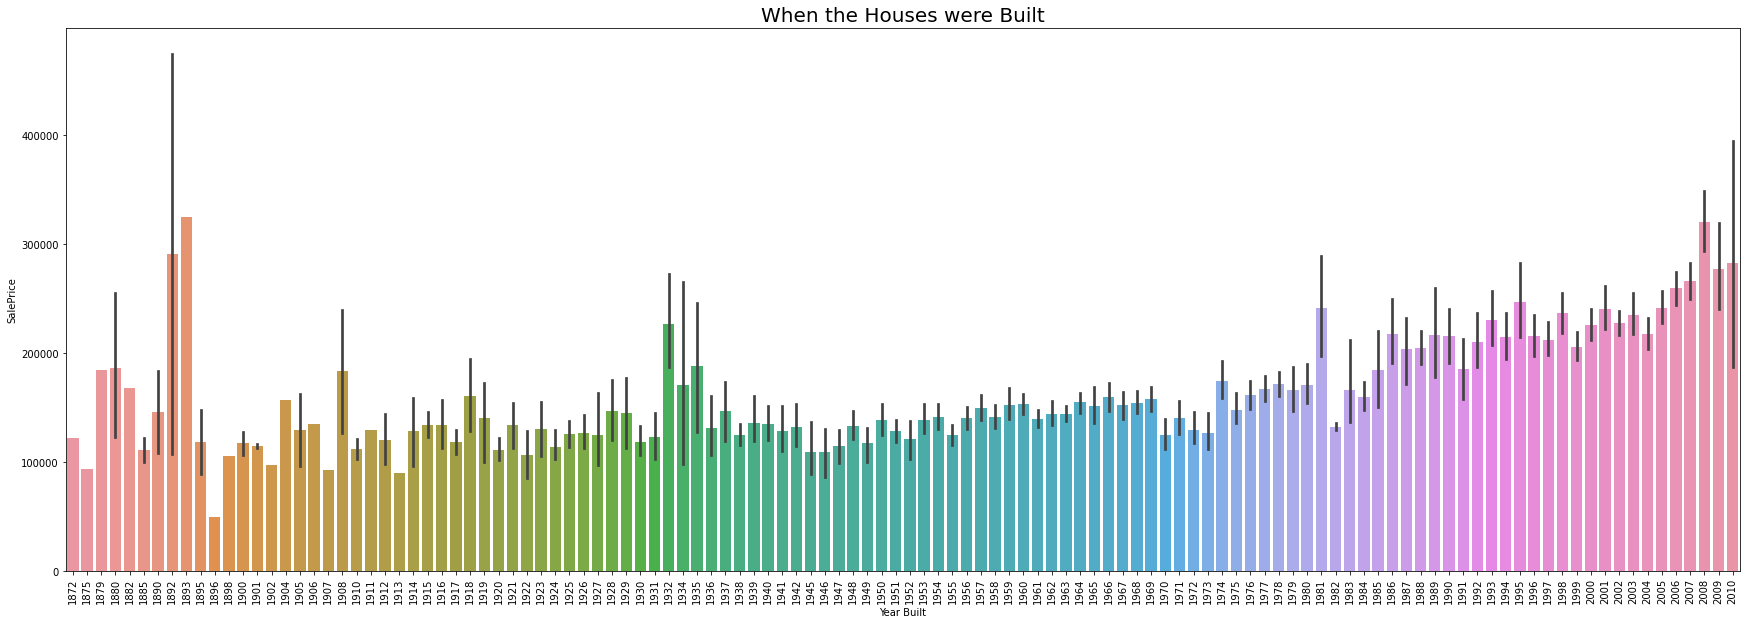

In [35]:
#SalePrice vs Year Built correlation
plt.figure(figsize=(30,10))
sns.barplot(x=data['Year Built'], y=data['SalePrice'])
plt.title('When the Houses were Built', fontsize=20)
plt.xticks(rotation='vertical')

### Observation: It is noted that most of the sales are fluctuating, yet the 2008 housing subprime morgage crisis is highly visable. 

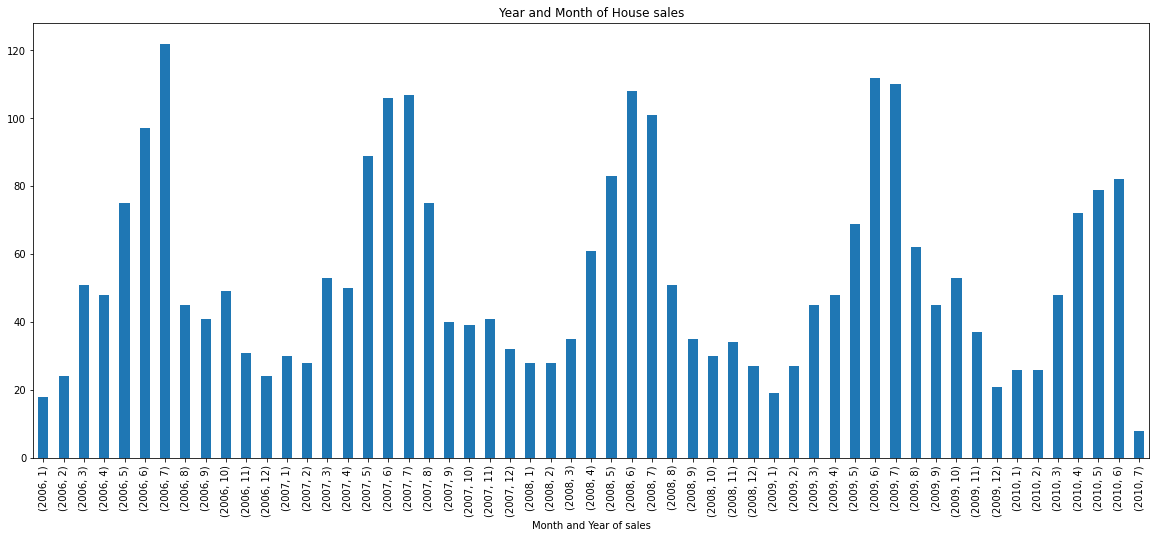

In [36]:
#time (Mnth, Yr) of houses' sales
data.groupby(['Yr Sold','Mo Sold']).Order.count().plot(kind='bar', figsize = (20,8))
plt.xlabel('Month and Year of sales')
plt.title('Year and Month of House sales')
plt.show()

### Observation: It is noted that most of the sales are happening in the middle of the year.

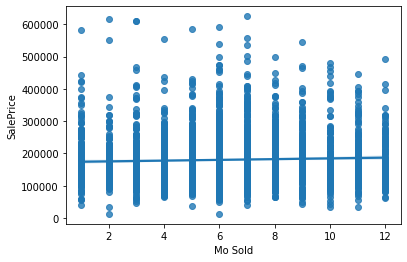

In [37]:
#effect on sale prices monthly
sns.regplot(x=data['Mo Sold'], y=data['SalePrice'])

### Observation: It is noted that most of the sales are happening in NAmes neighborhood whilst the least sales are happening in Landmrk neighborhood.

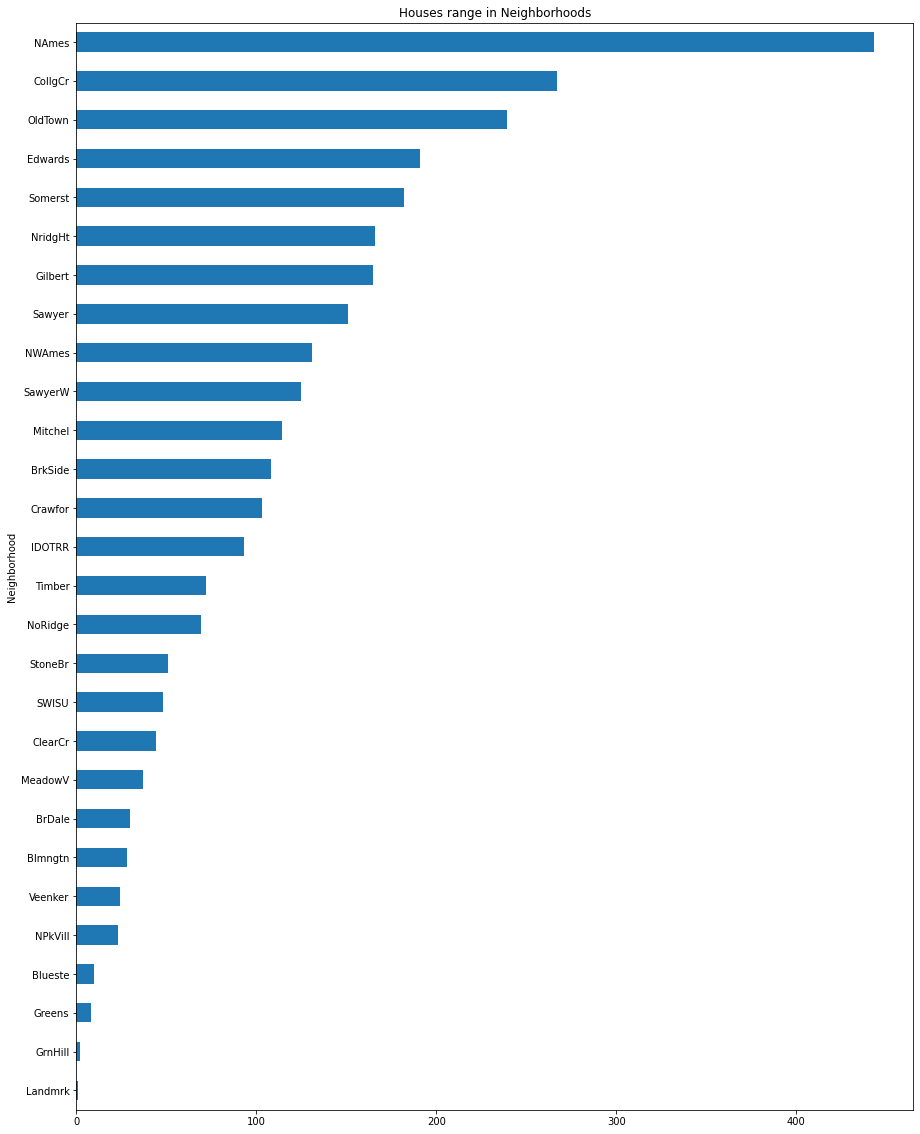

In [38]:
#Houses range in Neighborhoods
data.groupby('Neighborhood').Order.count().sort_values().plot(kind='barh', figsize=(15,20))
plt.title('Houses range in Neighborhoods')
plt.show()

### Observation: It is noted that most expensive neighborhood is StoneBr while BrDale, IDOTRR, and MeadowV are the least in price sale

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

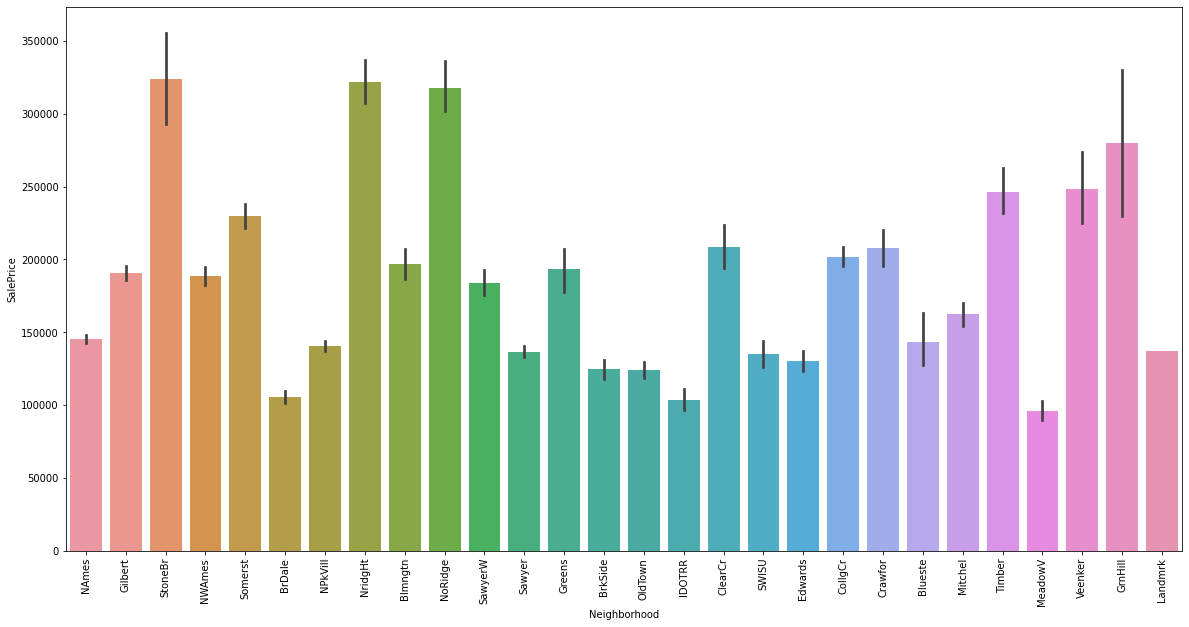

In [39]:
#SalePrice vs Neighborhood
plt.figure(figsize=(20,10))
sns.barplot(x=data['Neighborhood'], y=data['SalePrice'])
plt.xticks(rotation='vertical')

In [40]:
#plotting the correlation between the 'Neighborhood' and 'SalePrice' by getting the mean of the sale price in each neighborhood
data.groupby('Neighborhood')['Neighborhood', 'SalePrice'].mean()

<ipython-input-40-aed06e79c337>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Neighborhood')['Neighborhood', 'SalePrice'].mean()


,SalePrice
Neighborhood,
Blmngtn,196661.678571
Blueste,143590.000000
BrDale,105608.333333
BrkSide,124756.250000
ClearCr,208662.090909
CollgCr,201803.434457
Crawfor,207550.834951
Edwards,130130.973822
Gilbert,190646.575758


### The high correlation between the 'Overall Qual' and 'SalePrice' can be presented as follows:

In [41]:
#getting the mean of 'Overall Qual' and 'SalePrice'
data.groupby('Overall Qual')['Overall Qual', 'SalePrice'].mean()

<ipython-input-41-3c13897d35f7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Overall Qual')['Overall Qual', 'SalePrice'].mean()


,Overall Qual,SalePrice
Overall Qual,,
1,1.0,48725.000000
2,2.0,52325.307692
3,3.0,83185.975000
4,4.0,106485.097345
5,5.0,134752.516364
6,6.0,162130.318306
7,7.0,205025.760797
8,8.0,270913.594286
9,9.0,368336.766355


In [42]:
#showing the statistical description between 'Overall Qual' and 'SalePrice'
data.groupby(['Overall Qual', 'SalePrice']).describe()

Order                                              \
                       count    mean std     min     25%     50%     75%   
Overall Qual SalePrice                                                     
1            13100       1.0  1554.0 NaN  1554.0  1554.0  1554.0  1554.0   
             39300       1.0  1902.0 NaN  1902.0  1902.0  1902.0  1902.0   
             61000       1.0   766.0 NaN   766.0   766.0   766.0   766.0   
             81500       1.0  2904.0 NaN  2904.0  2904.0  2904.0  2904.0   
2            12789       1.0   182.0 NaN   182.0   182.0   182.0   182.0   
...                      ...     ...  ..     ...     ...     ...     ...   
10           552000      1.0   457.0 NaN   457.0   457.0   457.0   457.0   
             555000      1.0   424.0 NaN   424.0   424.0   424.0   424.0   
             610000      1.0   433.0 NaN   433.0   433.0   433.0   433.0   
             615000      1.0  1064.0 NaN  1064.0  1064.0  1064.0  1064.0   
             625000      1.0  2446.0 NaN  2446.0  2446.0  2446.0  2446.0   

                               Lot Frontage              ... Mo Sold       \
                           max        count        mean  ...     75%  max   
Overall Qual SalePrice                                   ...                
1            13100      1554.0          1.0   80.000000  ...     2.0  2.0   
             39300      1902.0          1.0   50.000000  ...     1.0  1.0   
             61000       766.0          1.0   69.023819  ...     3.0  3.0   
             81500      2904.0          1.0  125.000000  ...     5.0  5.0   
2            12789       182.0          1.0   68.000000  ...     6.0  6.0   
...                        ...          ...         ...  ...     ...  ...   
10           552000      457.0          1.0  100.000000  ...     2.0  2.0   
             555000      424.0          1.0  105.000000  ...     4.0  4.0   
             610000      433.0          1.0  105.000000  ...     3.0  3.0   
             615000     1064.0          1.0  106.000000  ...     2.0  2.0   
             625000     2446.0          1.0  118.000000  ...     7.0  7.0   

                       Yr Sold                                              \
                         count    mean std     min     25%     50%     75%   
Overall Qual SalePrice                                                       
1            13100         1.0  2008.0 NaN  2008.0  2008.0  2008.0  2008.0   
             39300         1.0  2007.0 NaN  2007.0  2007.0  2007.0  2007.0   
             61000         1.0  2009.0 NaN  2009.0  2009.0  2009.0  2009.0   
             81500         1.0  2006.0 NaN  2006.0  2006.0  2006.0  2006.0   
2            12789         1.0  2010.0 NaN  2010.0  2010.0  2010.0  2010.0   
...                        ...     ...  ..     ...     ...     ...     ...   
10           552000        1.0  2009.0 NaN  2009.0  2009.0  2009.0  2009.0   
             555000        1.0  2009.0 NaN  2009.0  2009.0  2009.0  2009.0   
             610000        1.0  2009.0 NaN  2009.0  2009.0  2009.0  2009.0   
             615000        1.0  2008.0 NaN  2008.0  2008.0  2008.0  2008.0   
             625000        1.0  2006.0 NaN  2006.0  2006.0  2006.0  2006.0   

                                
                           max  
Overall Qual SalePrice          
1            13100      2008.0  
             39300      2007.0  
             61000      2009.0  
             81500      2006.0  
2            12789      2010.0  
...                        ...  
10           552000     2009.0  
             555000     2009.0  
             610000     2009.0  
             615000     2008.0  
             625000     2006.0  

[1593 rows x 248 columns]

### Observation: It is highly noted that the higher the overall quality, the higher the price.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

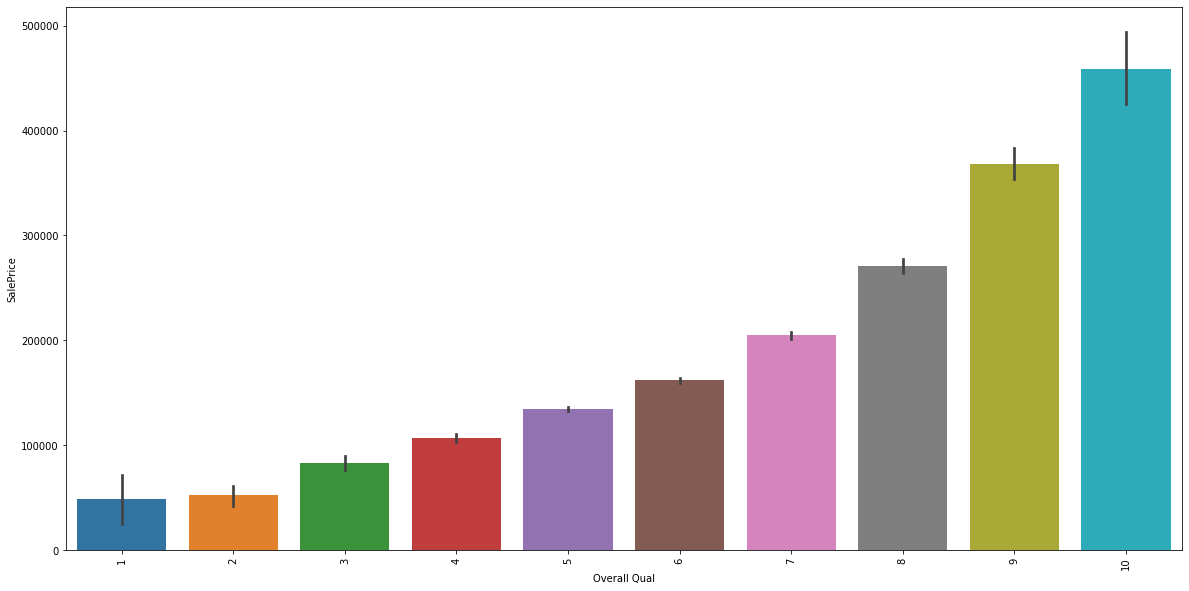

In [43]:
#'Overall Qual' and 'SalePrice' correlation
plt.figure(figsize=(20,10))
sns.barplot(x=data['Overall Qual'], y=data['SalePrice'])
plt.xticks(rotation='vertical')

### The high correlation between the 'Gr Liv Area' and 'SalePrice' can be presented as follows:




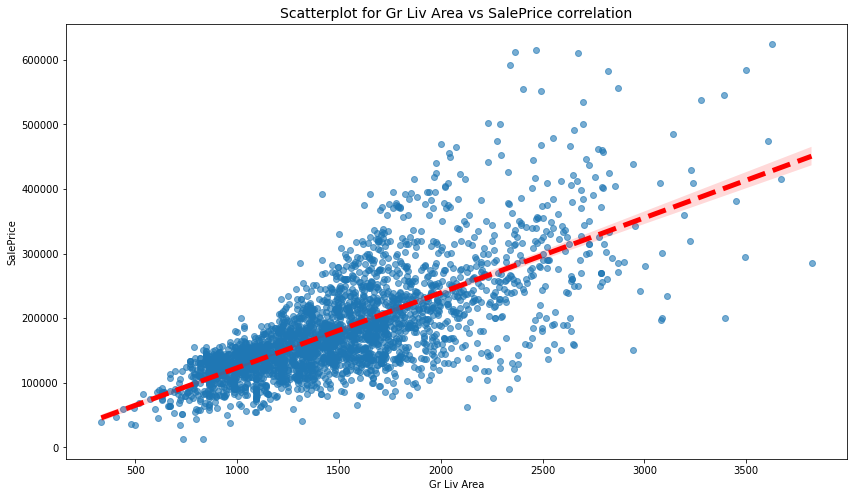

In [44]:
#corr. of saleprice and the grand living area
plt.figure(figsize=(14,8))
plot = sns.regplot(data=data, x='Gr Liv Area', y='SalePrice', 
                scatter_kws={'alpha': 0.6}, 
                line_kws={"lw":5, 'linestyle':'--', 'color': 'red'})
plt.title(label='Scatterplot for Gr Liv Area vs SalePrice correlation', fontsize=14)
plt.xlabel(xlabel='Gr Liv Area')
plt.ylabel(ylabel='SalePrice')
plt.show()

### Observation: It is highly noted that the larger the living area space, the higher the price.

It is highly appearant that both features are highly correlated that both are right skewed in distribution wise.

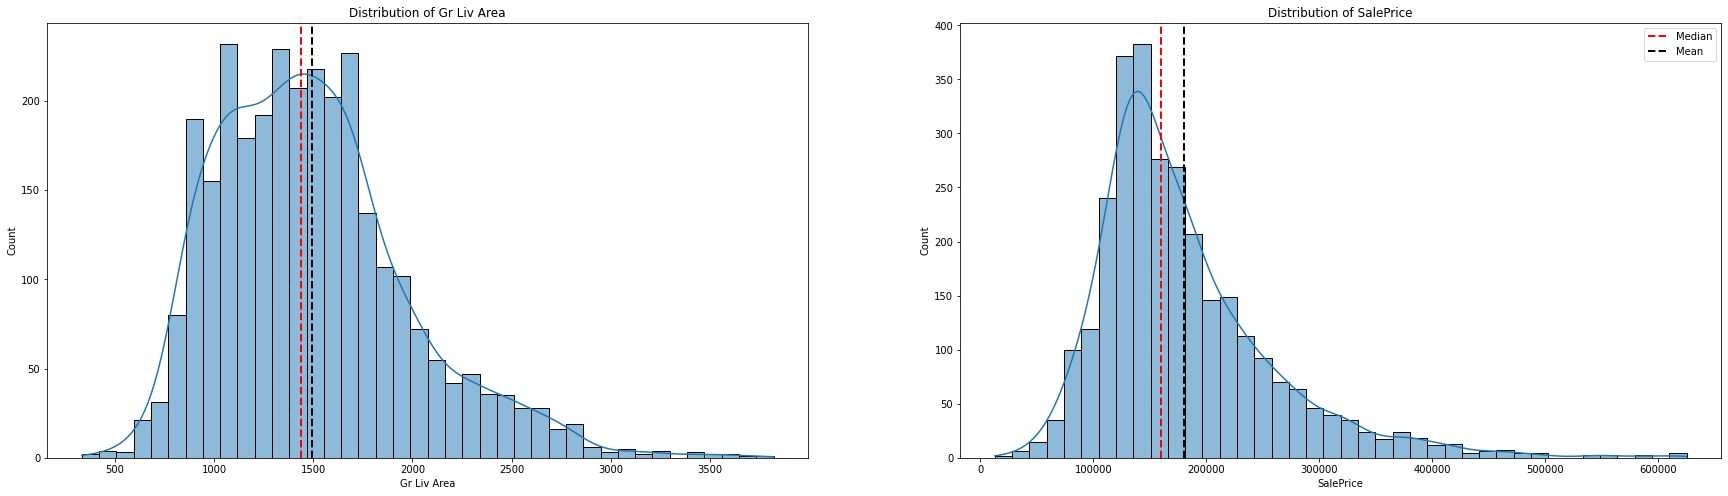

In [45]:
#plotting the statistical correlation between the 'Gr Liv Area' and 'SalePrice'
fig, ax = plt.subplots(figsize=(30,8), ncols=2)
sns.histplot(data=data, x='Gr Liv Area',bins=40, kde=True, ax=ax[0])
ax[0].axvline(data.loc[:,'Gr Liv Area'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
ax[0].axvline(data.loc[:,'Gr Liv Area'].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
ax[0].set_title('Distribution of Gr Liv Area', fontsize=12)
ax[0].set_xlabel('Gr Liv Area')

sns.histplot(data=data, x='SalePrice',bins=40, kde=True, ax=ax[1])
ax[1].axvline(data.loc[:,'SalePrice'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
ax[1].axvline(data.loc[:,'SalePrice'].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
ax[1].set_title('Distribution of SalePrice', fontsize=12)
ax[1].set_xlabel('SalePrice')
plt.legend()
plt.show()

### The high correlations between 'SalePrice' and {'Total Bsmt SF' and 'Garage Cars' is visualized as follows:

Regarding these correlations, it presents that the higher value of both features ('Total Bsmt SF' and 'Garage Cars'), the higher the 'SalePrice'. Hence to certain extent that the buyers prefer total square feet of basement area to be less than 3000 sqf and the number of cars which the garage can maintain not to be more than 3 cars otherwise the slope goes downwards. 

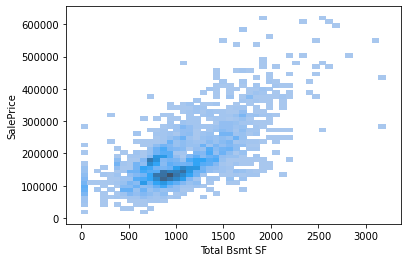

In [46]:
#plotting the correlation between the 'SalePrice' colum and the 'Total Bsmt SF' colum
sns.histplot(x=data['Total Bsmt SF'], y=data['SalePrice'])

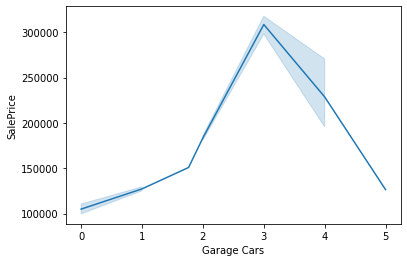

In [47]:
#plotting the correlation between the 'SalePrice' colum and the 'Garage Cars' colum
sns.lineplot(x=data['Garage Cars'], y=data['SalePrice'])

### Visualisation of the top five correlated featrues in the dataset

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


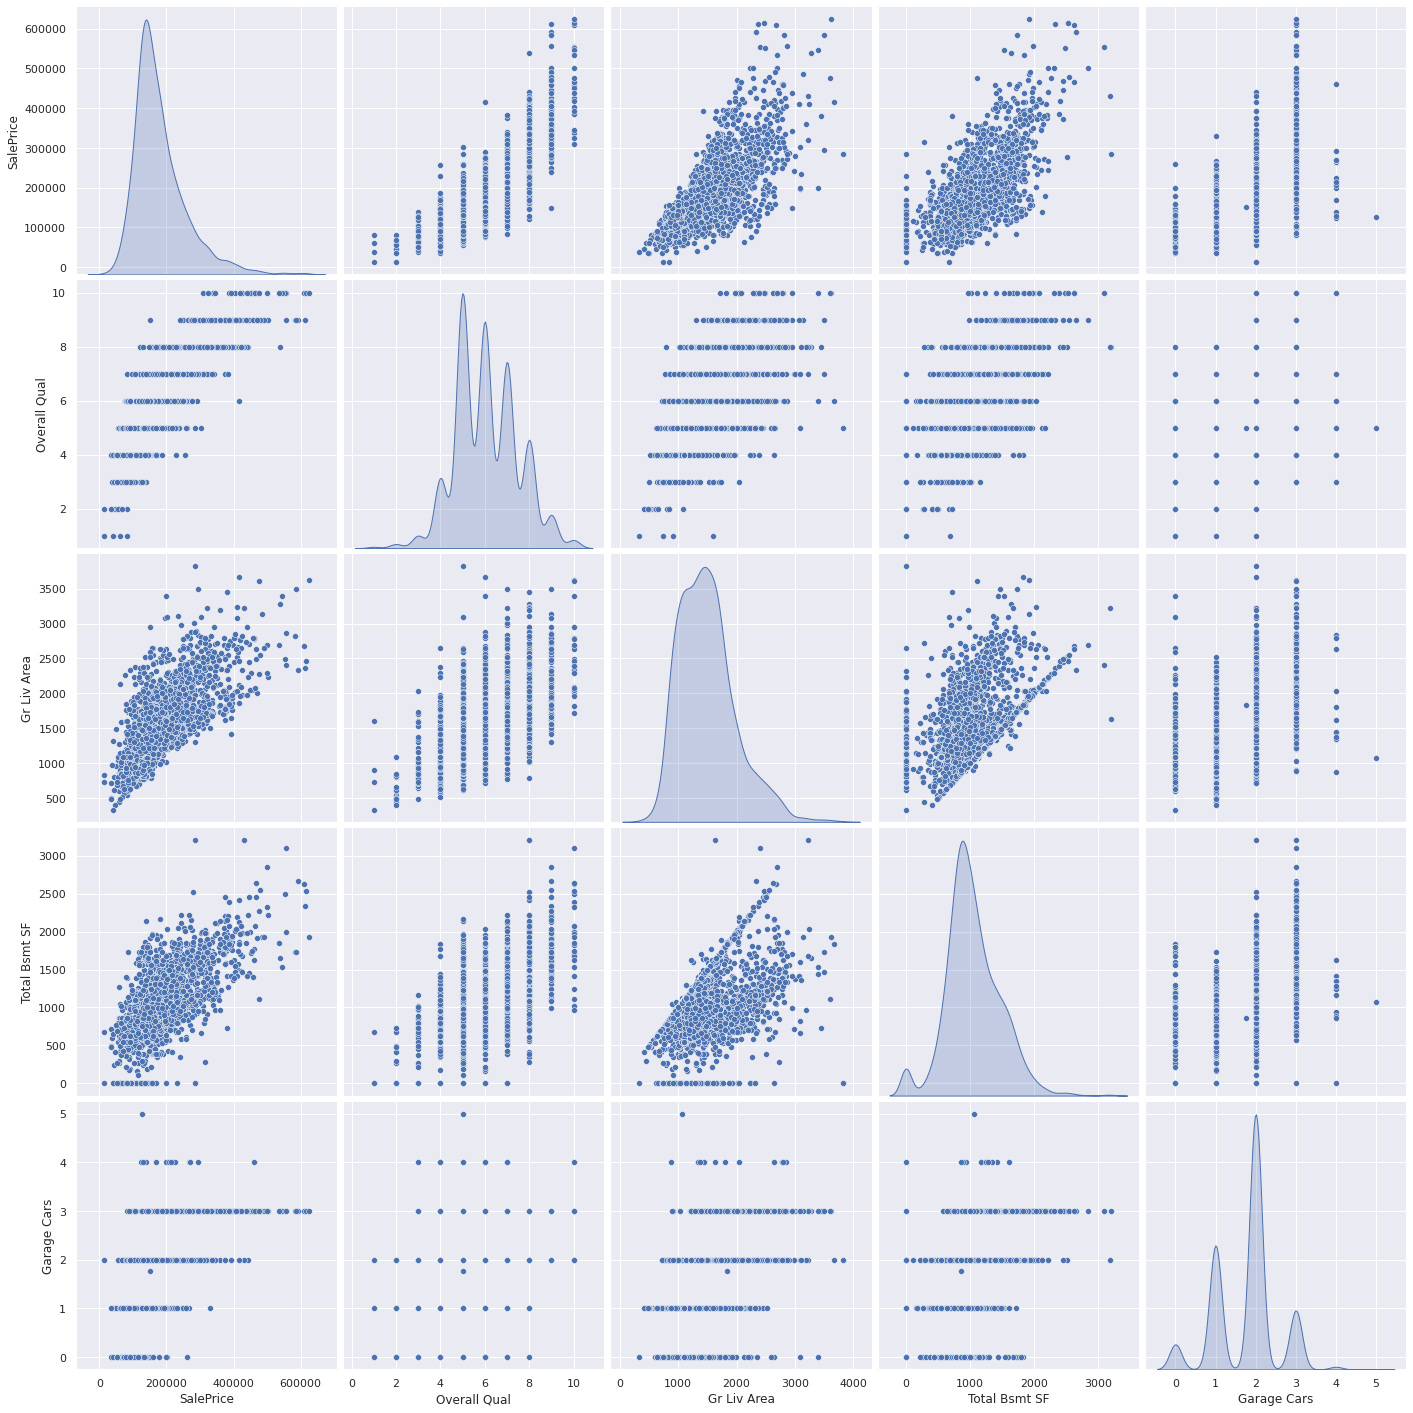

In [48]:
#Visualisation of the top catgories 'SalePrice','Overall Qual','Gr Liv Area', 'Total Bsmt SF', 'Garage Cars' in the form of scatter pairplot for the sake of better comprehension.
sns.set()
columns = ['SalePrice','Overall Qual','Gr Liv Area', 'Total Bsmt SF', 'Garage Cars']
sns.pairplot(data[columns],size = 4 ,kind ='scatter', diag_kind='kde')
plt.show()

# Conculsion

In our dataset and taking the correlation heatmap into consideration, the analysis observed that the target variable 'SalePrice' is highly correlated to 'OverallQual', 'GrLivArea', 'TotalBsmtSF' 'GarageCars' and 'GarageArea'. This analysis determines what makes a house worth more or less to buyers. The dataset has shown many features that typically describe a given property, such as the space for a living area, overall quality metrics for interior and exterior sections. The various plots charted for comparing correlation between these features and the property sale price have shown strong indication that price is highly influenced in various ways by these mentioned features. Hence, this given data would provide a varible set of features that can be used as a reference for sales offices, property brokers, and buyers. The above analysis has been implememted as follows:

After importing all relevant Python modules and google drive, the data file is loaded as a csv file and investigated the data shape, size and statistical description. The target variable 'SalePrice' is defined and statistically described. After that, the numerical and categorical features are identified for furthur analysis and encoding. As advised in dataset documentation, the houses wih 'GrLivArea' over than 4000 sqf. are considered as outliers. Thus, they are removed which left us with 2925 observations instead of 2930. 

For the sake of consistancy and ease of analysis and identifing the correlation among variables, some ordinal colums have been encoded. Regarding missing values, it has been filled with 'N/A' text as the empty cell means that the house does not have the missing features whilst the other numeric missing features are filled with the mean. Furthermore, the EDA was implemented by generating heatmaps to identify both positive and negative correlations.

The correlation between SalePrice and the time of sale has shown the unfortunate event of the housing bubble crisis in 2008 which is started in 2007. The housing market collapse which had a multiplicative effect on the economy, negatively in key areas, and thus contributing significantly to the great recession of September, 2007. It slowed building activity, consumer wealth and spending, financial institutions capacity to lend that explains the downfall in the correlation graph of 'Month and Year of sales'.Finally, some colums have been droped for different reasons which are mentioned above on top of each drop cell that left us with 64 colums. 




